**התקנת ספריה ליצירת אובייקטים ויזואלים (כגון גרפים) בפייתון**

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


**מאפשר לרנדר את הגרפים שיוצרים באמצעות הספירה**

In [2]:
%matplotlib inline

**מאפשר לנו לעבוד ולהציג אלמנטים בעזרת לוח שנה**

In [3]:
import calendar

**קיצור לספריה המאפשרת לנו לעבוד עם מאגרי נתונים**

In [4]:
import pandas as pd

**קיצור לספריה המאפשרת לנו לעבוד עם פונקציות מתמטיות שונות**

In [5]:
import numpy as np

**קיצור לשימוש בפונקציות ספציפיות מתוך הספריה**

In [6]:
from matplotlib import pyplot as plt

**קיצור לספרית צבעים**

In [7]:
import matplotlib.colors as mcolors

**השמת מאגר הנתונים לתוך משתנה**

In [8]:
df = pd.read_csv("reservationsN.csv")

**משנה את פורמט השדה לסוג 'תאריך' בפייתון**

In [9]:
df['statD'] = pd.to_datetime(df['statD'])

**מפלטר את הרשומות כך שיוצגו רק רשומות שהסטטוס הזמה שלהם הוא 'ביטל את ההזמנה' (דבר המסונכרן עם תאריך שינוי הסטטוס לשם קבלת ימות השבוע של הביטולים)**

In [10]:
filtered_df = df[df['stat'].isin(['Canceled'])].copy()

**מוסיפים לכל רשומה שדה בשם 'יום בשבוע' אשר לוקח את תאריך שינוי הסטטוס ובהתאם אומר לנו באיזה יום בשבוע הוא**

In [11]:
filtered_df.loc[:, 'Day of Week'] = filtered_df['statD'].dt.day_name()

**מקבץ וסופר את כל הרשומות לפי ימות השבוע**

In [12]:
agg_data = filtered_df.groupby('Day of Week')['ADLT'].count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

**יצירת גרף מתוך הטבלה שיצרנו**

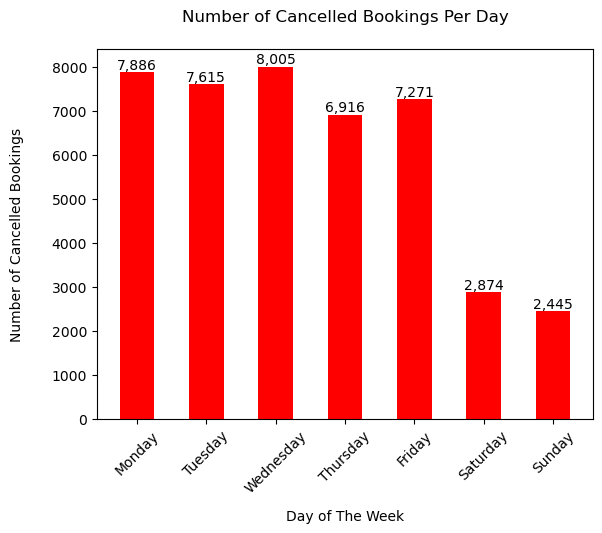

In [13]:
#הגדרת הגרף
fig, ax = plt.subplots()

#הגדרת הערכים מתוך הטבלה שיצרנו
days = agg_data.index
counts = agg_data.values

#ישום הגרף באמצעות הערכים
myGraph = ax.bar(days, counts, width=0.5, color="red")

#הגדרת כותרות מתאימות וכן ערך מספרי לכל עמודה
ax.bar_label(myGraph, fmt='{:,.0f}')
ax.set_xlabel('Day of The Week', labelpad=10)
ax.set_ylabel('Number of Cancelled Bookings',labelpad=20)
ax.set_title('Number of Cancelled Bookings Per Day',pad=20)
plt.xticks(rotation=45)

#הצגת הגרף
plt.show()

**יצירת שדה חדש המחשב את סכום כל הזמנה**

In [14]:
df['total booking amount'] = df['DailyAVG'] * (df['weekendnights'] + df['weeknights'])

**יצירת שדה חדש המיצג לנו את ההכנסות המצטברות לכל הזמנה**

In [15]:
df['Valid income'] = np.where(
    (df['stat'] == 'Check-Out') | (df['deposit'] == 'Non Refund'),
    df['total booking amount'],
    0
)

**מפלטר לנו את ההזמנות הלא מוגדרות**

In [16]:
df_filtered = df[df['cruise'] != 'Undefined']
cruise_sum = df_filtered.groupby('cruise')['Valid income'].sum()

**יצירת גרף פאי**

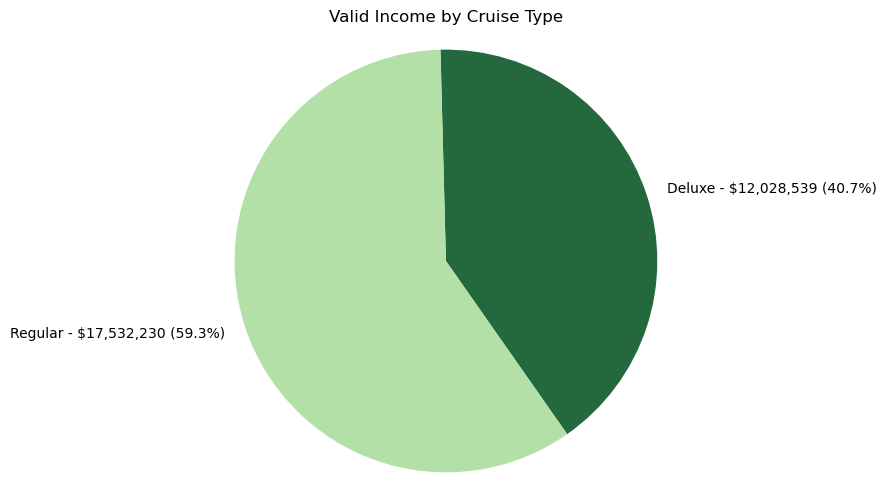

In [17]:
#הגדרת הגרף
plt.figure(figsize=(6, 6))

#מתן צבעים
colors = ['#24693d', '#b3e0a6'] 

#ישום גרף פאי
plt.pie(cruise_sum, labels=[f'{label} - ${value:,.0f} ({(value / cruise_sum.sum()) * 100:.1f}%)' for label, value in cruise_sum.items()], autopct='', startangle=-55, colors=colors)
plt.axis('equal')

#כותרת
plt.title('Valid Income by Cruise Type')

#הצגת הגרף
plt.show()

**פונקציה המקבלת את החודש, השנה וסוג השייט הרצוי מהמהשתמש**

In [18]:
def get_user_input():
    while True:
        try:
            month = int(input("Enter the month (1-12): "))
            if month < 1 or month > 12:
                raise ValueError("Month must be between 1 and 12")
            year = int(input("Enter the year: "))
            cruise_type = input("Enter the cruise type: ")
            return month, year, cruise_type
        except ValueError as e:
            print(f"Error: {e}. Please enter a valid month (1-12).")

**פונקציה הממירה לפורמט תאריך מסודר המסונן לפי חודש, שנה וסוג השייט הנבחר**

In [19]:
def filter_data(data, month, year, cruise_type):
    data['statD'] = pd.to_datetime(data['statD'], errors='coerce')
    filtered_data = data[(data['statD'].dt.month == month) &
                         (data['statD'].dt.year == year) &
                         (data['cruise'] == cruise_type)]
    return filtered_data

**שלוש פונקציות: אחת שיוצרת את מראה היומן, השניה מציירת את הימים על הגרף והשלישית מוסיפה את הצבעים המבוקשים**

In [20]:
#יצירת גרף היומן
def create_calendar_plot(filtered_data, month, year):
    days_in_month = calendar.monthrange(year, month)[1]
    occupancy_data = np.zeros(days_in_month)

    #יישום ימות החודש על הגר
    for day in range(1, days_in_month + 1):
        day_data = filtered_data[filtered_data['statD'].dt.day == day]
        if not day_data.empty:
            occupancy_data[day - 1] = day_data['TTT'].values[0]
    
    #הגדרת הגרף
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_title(f"Occupancy for {calendar.month_name[month]} {year}", fontsize=16, pad=20)
        
    #צבעים   
    cmap = plt.colormaps.get_cmap('YlGn')
    norm = mcolors.Normalize(vmin=0, vmax=100)
    
    #הגדרת היום בשבוע של היום הראשון לחודש הנבחר
    start_day_of_week = calendar.monthrange(year, month)[0]
        
    #יישום הצבע המתאים לכל יום על סמך ערכו ביחס לשאר
    for day in range(1, days_in_month + 1):
        row = (start_day_of_week + day - 1) // 7 + 1
        col = (start_day_of_week + day - 1) % 7
        color = cmap(norm(occupancy_data[day - 1]))
        ax.add_patch(plt.Rectangle((col, -row), 1, 1, edgecolor='black', facecolor=color))
        ax.text(col + 0.5, -row + 0.5, str(day), horizontalalignment='center', verticalalignment='center')
        
    #הגבלת שורות ועמודות עבור היומן שיתאים לזו של חודש
    ax.set_xlim(0, 7)
    ax.set_ylim(-((start_day_of_week + days_in_month + 6) // 7), 0)
    ax.axis('off')
        
    #יצירת המפתח עזר
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, orientation='vertical', ax=ax, pad=0.02)
    cbar.set_label('Occupancy (%)', rotation=270, labelpad=20)
    
    #הצגת הגרף והמפתח
    plt.show()

**קבלת קלט מהמשתמש וישומו בשאילתה על מנת לקבל את הגרף המבוקש**

Enter the month (1-12):  7
Enter the year:  2015
Enter the cruise type:  Deluxe


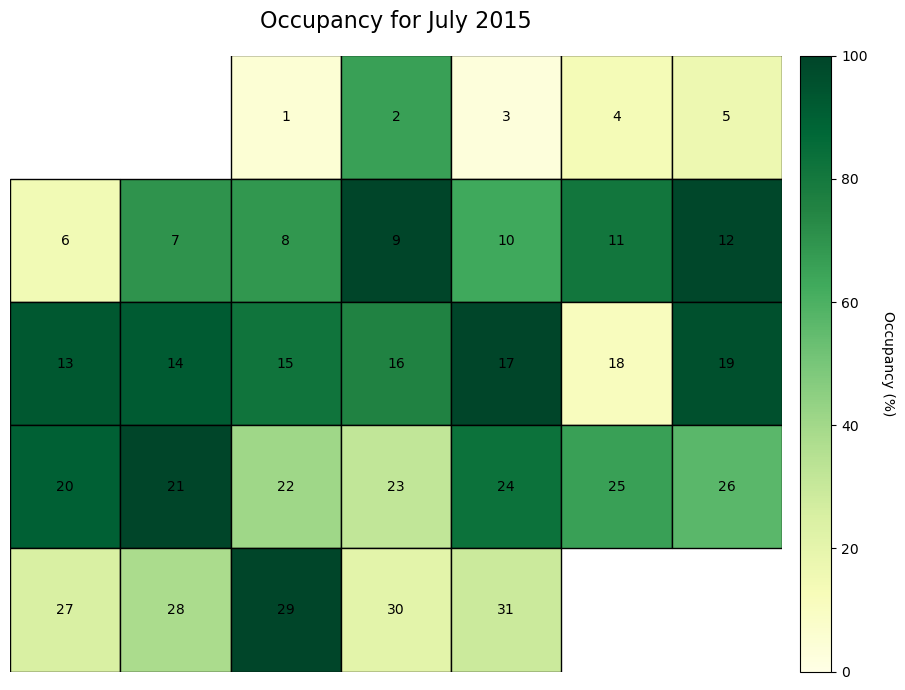

In [21]:
month, year, cruise_type = get_user_input()


filtered_data = filter_data(df, month, year, cruise_type)


create_calendar_plot(filtered_data, month, year)

**סינון כל הנתונים להזמנות שהסטטוס שלהם הוא צ'ק אווט**

In [22]:
check_outs = df[df['stat'] == 'Check-Out']

**נגדיר תתי קטגוריות למספרי הסוכנים בשביל מראה נקי ומסודר יותר** 

In [23]:
def categorize_agent(agent_number):
    if agent_number <= 100:
        return 'Agents 1-100'
    elif 100 < agent_number <= 200:
        return 'Agents 101-200'
    else:
        return 'Agents 201 and Above'

**יצירת העתק כדי לא לפגוע בטבלה, שינוי ושיבוץ שמות הקטגוריות וכן מיונם**

In [24]:
check_outs_copy = check_outs.copy()

check_outs_copy['AgentCategory'] = check_outs_copy['agentNr'].apply(categorize_agent)

agent_checkouts = check_outs_copy.groupby('AgentCategory').size().reset_index(name='Number_of_Checkouts')

agent_checkouts = agent_checkouts.sort_values(by='Number_of_Checkouts', ascending=False)

**יצירת גרף עמודות**

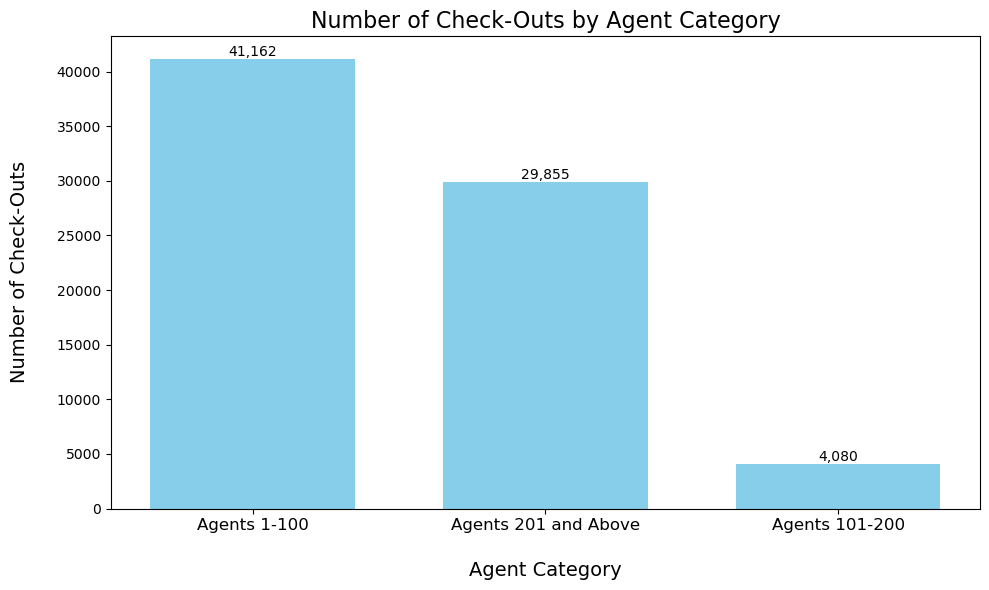

In [25]:
#הגדרת הגרף להיות גרף עמודות
plt.figure(figsize=(10, 6))

#עמודות
bars = plt.bar(agent_checkouts['AgentCategory'], agent_checkouts['Number_of_Checkouts'], color='skyblue', width=0.7)

#כותרת
plt.title('Number of Check-Outs by Agent Category', fontsize=16)

#כותרות הצירים
plt.xlabel('Agent Category', fontsize=14, labelpad=20)
plt.ylabel('Number of Check-Outs', fontsize=14, labelpad=20)

#סימוניות עבור ציר האיקס
plt.xticks(rotation=0, ha='center', fontsize=12)
plt.tight_layout()

#הוספת הערך המספרי של כל עמודה
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f'{yval:,}', ha='center', va='bottom', fontsize=10)

#הצגת הגרף
plt.show()